# Paper Link :- https://arxiv.org/abs/2010.11929

In [1]:
import matplotlib.pyplot as plt 
from data_setup import create_dataloader
from pathlib import Path
from utils import get_class_names


import torch
import torch.nn as nn
from torchvision import transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
data_directory = Path("../../Projects/dog_breed_classification/data")
images_directory = data_directory/"Images"
images_directory

PosixPath('../../Projects/dog_breed_classification/data/Images')

In [4]:
class_names,class_to_idx,idx_to_class = get_class_names(images_directory=images_directory)

In [5]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [6]:
train_dataloader,test_dataloader = create_dataloader(images_directory=images_directory,
                                                     batch_size=32,
                                                     data_transforms=data_transforms,
                                                     num_workers=0)

In [7]:
len(train_dataloader),len(test_dataloader)

(515, 129)

In [8]:
img,label = next(iter(train_dataloader))
img[0].shape

torch.Size([3, 224, 224])

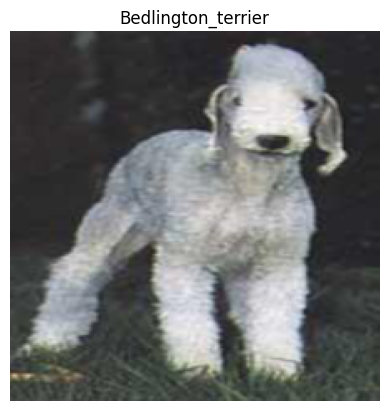

In [9]:
plt.imshow(img[1].permute(1,2,0))
plt.title(idx_to_class[label[1].item()])
plt.axis("off");

In [10]:
import random
random.seed(42)

In [11]:
height = 224
width = 224 
color_channels = 3
patch_size = 16


number_of_patches = int((height*width)/(patch_size*patch_size))
print(f"No. of patches:- {number_of_patches}")

No. of patches:- 196


In [12]:
embedding_layer_input_shape = (height,width,color_channels)
embedding_layer_output_shape = (number_of_patches, (patch_size**2)*color_channels)
print(f"Input Shape: {embedding_layer_input_shape}\nOutput Shape: {embedding_layer_output_shape}")

Input Shape: (224, 224, 3)
Output Shape: (196, 768)


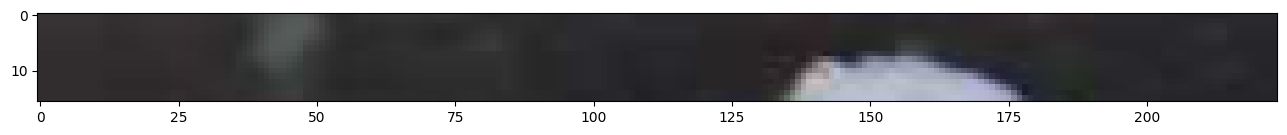

In [13]:
image_permuted = img[1].permute(1,2,0)
plt.figure(figsize=(patch_size,patch_size))
plt.imshow(image_permuted[:patch_size,:,:])


In [14]:
img_size = 224
num_patches_per_row = img_size/patch_size
assert img_size%patch_size == 0

print(num_patches_per_row)

14.0


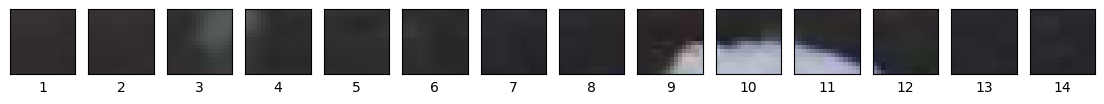

In [15]:
fig,axis = plt.subplots(nrows=1,
                        ncols=img_size//patch_size,
                        figsize=(num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch in enumerate(range(0,img_size,patch_size)):
    
    axis[i].imshow(image_permuted[
        :patch_size,patch:patch+patch_size, :]);
    axis[i].set_xlabel(i+1)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

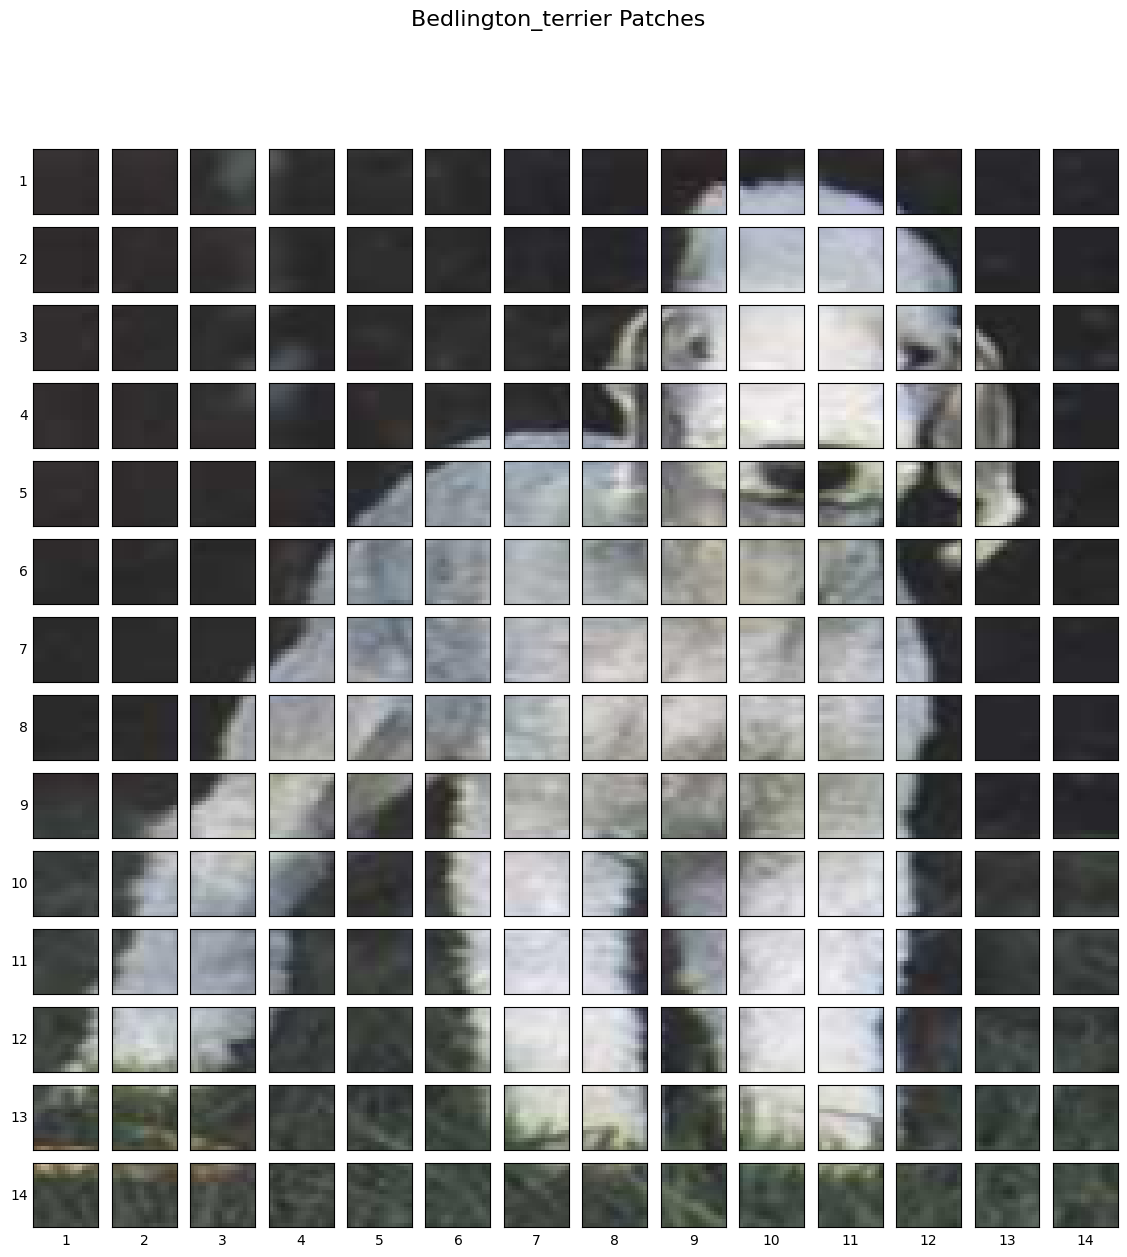

In [16]:
fig,axis = plt.subplots(nrows=img_size//patch_size,
                        ncols = img_size//patch_size,
                        figsize = (num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch_height in enumerate(range(0,img_size,patch_size)):
    for j,patch_width in enumerate(range(0,img_size,patch_size)):
        
        axis[i,j].imshow(image_permuted[patch_height:patch_height+patch_size,patch_width:patch_width+patch_size,:])
        axis[i,j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        
        axis[i,j].set_xlabel(j+1)
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        axis[i,j].label_outer()
        
        
fig.suptitle(f"{idx_to_class[label[1].item()]} Patches",fontsize=16)
plt.show()



In [17]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768,
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)

In [18]:
image = img[1]

image_out_of_conv = conv2d(image.unsqueeze(dim=0))
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

tensor([[[ 0.0995,  0.0988,  0.0595,  0.1142,  0.0969,  0.1015,  0.0686,
           0.0818,  0.3213,  0.4054,  0.2684,  0.1039,  0.0773,  0.0919],
         [ 0.1048,  0.0956,  0.1025,  0.0950,  0.1069,  0.0997,  0.0769,
           0.0794,  0.1649,  0.3690,  0.3603,  0.4613,  0.0869,  0.0739],
         [ 0.1092,  0.1007,  0.1002,  0.0963,  0.1099,  0.0956,  0.1059,
           0.1996,  0.2415,  0.4698,  0.5034,  0.2328,  0.1492,  0.0741],
         [ 0.1122,  0.1051,  0.0695,  0.0861,  0.1142,  0.2239,  0.1471,
           0.0315,  0.2476,  0.3826,  0.4665,  0.2730,  0.1892,  0.0719],
         [ 0.1016,  0.0973,  0.0963,  0.0937,  0.2583,  0.2989,  0.3395,
           0.3566,  0.1778,  0.3724,  0.0377,  0.0230,  0.3528,  0.0861],
         [ 0.0898,  0.0877,  0.0971,  0.2376,  0.2643,  0.2519,  0.3510,
           0.3756,  0.2643,  0.3624,  0.3032, -0.1087,  0.0918,  0.0907],
         [ 0.0963,  0.0940,  0.1472,  0.2210,  0.3053,  0.2493,  0.3141,
           0.3951,  0.4661,  0.4107,  0.3892,

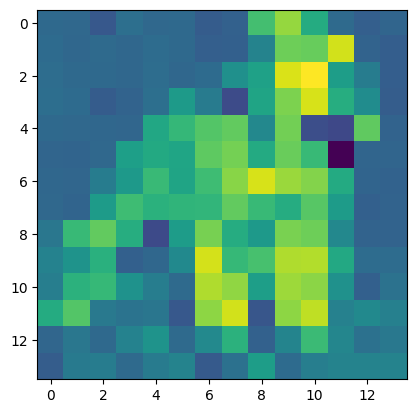

In [19]:
single_feature_map = image_out_of_conv[:,0,:,:]
print(single_feature_map)
plt.imshow(single_feature_map.permute(1,2,0).detach().numpy())

In [20]:
flatten = nn.Flatten(start_dim=2,end_dim=3)
image_out_of_conv_flatten = flatten(image_out_of_conv)
print(image_out_of_conv_flatten.shape)
correct_image_out_of_conv_flatten = image_out_of_conv_flatten.permute(0,2,1)
print(correct_image_out_of_conv_flatten.shape)

torch.Size([1, 768, 196])
torch.Size([1, 196, 768])


In [21]:
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

(np.float64(-0.5), np.float64(195.5), np.float64(0.5), np.float64(-0.5))

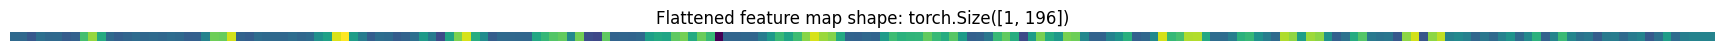

In [22]:
single_flattened_feature_map = correct_image_out_of_conv_flatten[:,:,0]
plt.figure(figsize=(22,22))
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.axis("off")

In [23]:
single_flattened_feature_map

tensor([[ 0.0995,  0.0988,  0.0595,  0.1142,  0.0969,  0.1015,  0.0686,  0.0818,
          0.3213,  0.4054,  0.2684,  0.1039,  0.0773,  0.0919,  0.1048,  0.0956,
          0.1025,  0.0950,  0.1069,  0.0997,  0.0769,  0.0794,  0.1649,  0.3690,
          0.3603,  0.4613,  0.0869,  0.0739,  0.1092,  0.1007,  0.1002,  0.0963,
          0.1099,  0.0956,  0.1059,  0.1996,  0.2415,  0.4698,  0.5034,  0.2328,
          0.1492,  0.0741,  0.1122,  0.1051,  0.0695,  0.0861,  0.1142,  0.2239,
          0.1471,  0.0315,  0.2476,  0.3826,  0.4665,  0.2730,  0.1892,  0.0719,
          0.1016,  0.0973,  0.0963,  0.0937,  0.2583,  0.2989,  0.3395,  0.3566,
          0.1778,  0.3724,  0.0377,  0.0230,  0.3528,  0.0861,  0.0898,  0.0877,
          0.0971,  0.2376,  0.2643,  0.2519,  0.3510,  0.3756,  0.2643,  0.3624,
          0.3032, -0.1087,  0.0918,  0.0907,  0.0963,  0.0940,  0.1472,  0.2210,
          0.3053,  0.2493,  0.3141,  0.3951,  0.4661,  0.4107,  0.3892,  0.2661,
          0.0883,  0.0836,  

In [24]:
correct_image_out_of_conv_flatten.shape[2]

768

In [25]:
correct_image_out_of_conv_flatten.shape[0]

1

In [26]:
batch_size = correct_image_out_of_conv_flatten.shape[0]
embedding_dim = correct_image_out_of_conv_flatten.shape[-1]

class_token = nn.Parameter(torch.ones(batch_size,1,embedding_dim),requires_grad=True)

print(class_token[:,:,:10])
print(class_token.shape)

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
torch.Size([1, 1, 768])


In [27]:
patch_embedding_image_with_class_embedding = torch.cat((class_token,correct_image_out_of_conv_flatten),dim=1)

In [28]:
patch_embedding_image_with_class_embedding.shape

torch.Size([1, 197, 768])

In [29]:
patch_embedding_image_with_class_embedding

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.0995,  0.2029,  0.0688,  ...,  0.1122, -0.0833,  0.0504],
         [ 0.0988,  0.1926,  0.0677,  ...,  0.1149, -0.0885,  0.0552],
         ...,
         [ 0.1644,  0.3333,  0.1226,  ...,  0.1644, -0.0956,  0.0608],
         [ 0.1656,  0.3349,  0.0343,  ...,  0.1554, -0.1942,  0.0478],
         [ 0.1656,  0.2830,  0.0727,  ...,  0.1776, -0.1142,  0.0579]]],
       grad_fn=<CatBackward0>)

In [30]:
positional_embedding = nn.Parameter(torch.ones(1,number_of_patches+1,embedding_dim),
                                    requires_grad=True)

positional_embedding[:,:10,:10]

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)

In [31]:
positional_embedding.shape

torch.Size([1, 197, 768])

In [32]:
path_and_postion_embedding = patch_embedding_image_with_class_embedding + positional_embedding

In [33]:
path_and_postion_embedding.shape

torch.Size([1, 197, 768])

In [34]:
path_and_postion_embedding

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [1.0995, 1.2029, 1.0688,  ..., 1.1122, 0.9167, 1.0504],
         [1.0988, 1.1926, 1.0677,  ..., 1.1149, 0.9115, 1.0552],
         ...,
         [1.1644, 1.3333, 1.1226,  ..., 1.1644, 0.9044, 1.0608],
         [1.1656, 1.3349, 1.0343,  ..., 1.1554, 0.8058, 1.0478],
         [1.1656, 1.2830, 1.0727,  ..., 1.1776, 0.8858, 1.0579]]],
       grad_fn=<AddBackward0>)

In [35]:
from image_embedding import ImageEmbedding

convert_image_embedding = ImageEmbedding(number_of_patches=number_of_patches,
                                         batch_size=batch_size)

In [36]:
path_and_postion_embedding_final = convert_image_embedding(image.unsqueeze(dim=0))

torch.Size([1, 3, 224, 224])


In [38]:
#path_and_postion_embedding_final.shape

In [39]:
from MHA_block import MultiHeadAttention

multihead_attention_block = MultiHeadAttention(12,768,0)

patched_image_through_mha = multihead_attention_block(path_and_postion_embedding)
patched_image_through_mha

tensor([[[ 0.3638, -0.1412, -0.1699,  ..., -0.2993,  0.3363,  0.2714],
         [ 0.3643, -0.1399, -0.1728,  ..., -0.2973,  0.3348,  0.2752],
         [ 0.3642, -0.1399, -0.1730,  ..., -0.2969,  0.3343,  0.2754],
         ...,
         [ 0.3646, -0.1391, -0.1721,  ..., -0.2985,  0.3345,  0.2756],
         [ 0.3633, -0.1383, -0.1732,  ..., -0.2971,  0.3370,  0.2750],
         [ 0.3636, -0.1413, -0.1750,  ..., -0.2972,  0.3344,  0.2758]]],
       grad_fn=<TransposeBackward0>)

In [40]:
patched_image_through_mha.shape

torch.Size([1, 197, 768])

In [41]:
from MLP_block import MLPBlock

mlp_block = MLPBlock(768,3072)

patched_image_through_mlp = mlp_block(patched_image_through_mha)
patched_image_through_mlp

tensor([[[ 0.1108,  0.1753, -0.4359,  ...,  0.2877,  0.0207, -0.2127],
         [ 0.0019,  0.1333, -0.2780,  ...,  0.3753,  0.0834, -0.2749],
         [ 0.1061,  0.2120, -0.2715,  ...,  0.3063, -0.0388, -0.1628],
         ...,
         [-0.1402,  0.2243, -0.4108,  ...,  0.3510,  0.0902, -0.2438],
         [ 0.0134,  0.1411, -0.3640,  ...,  0.4496,  0.0528, -0.1962],
         [ 0.0483,  0.1859, -0.0000,  ...,  0.2904,  0.0564, -0.3240]]],
       grad_fn=<MulBackward0>)

In [42]:
patched_image_through_mlp.shape

torch.Size([1, 197, 768])

In [43]:
from vision_transformer import VisionTransformer
from torchinfo import summary

transformer_encoder_block = VisionTransformer(embedding_dim=768,
                                                num_heads=12,
                                                mlp_size=3072,
                                                mlp_dropout=0.1,
                                                attention_dropout=0)

summary(model=transformer_encoder_block,
        input_size = (1,197,768),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                   [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadAttention (mha)                              [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attention)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                                  [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Linear (layer1)                                  [1, 197, 768]        [1, 197, 3072]       2,362,368            True
│  

In [44]:
from final_model import FinalModel
from train_test_step import train

model = FinalModel(batch_size=32).to(device)
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()


# Train the model and save the training results to a dictionary
train_loss,train_acc,test_loss,test_acc = train(epochs=20,
                                                model=model,
                                                train_dataloader=train_dataloader,
                                                test_dataloader=test_dataloader,
                                                loss_fn=loss_fn,
                                                optimizer=optimizer,
                                                device=device)

torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 3, 224, 224])
torch.Size([32, 196, 768])
torch.Size([32, 1, 768])
torch.Size([32, 

TypeError: dropout(): argument 'input' (position 1) must be Tensor, not NoneType